In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from nn.nn import NeuralNetwork



In [3]:
# Load the digits dataset
digits = load_digits()
X = digits.data  
X.shape

(1797, 64)

In [4]:
# Normalize data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [5]:
X_train, X_val = train_test_split(X, test_size=0.2, random_state=42)

# Reshape for neural network input (each feature as a column)
X_train = X_train.T  
X_val = X_val.T      

In [6]:
nn_arch = [
    {"input_dim": 64, "output_dim": 16, "activation": "relu"},   # Encoder
    {"input_dim": 16, "output_dim": 64, "activation": "sigmoid"}  # Decoder
]

autoencoder = NeuralNetwork(
    nn_arch=nn_arch,
    lr=0.01,
    seed=42,
    batch_size=128,
    epochs=5000,
    loss_function='mse' 
)

train_loss, val_loss = autoencoder.fit(X_train, X_train, X_val, X_val)

Epoch 0: Train Loss = 0.1834, Val Loss = 0.1824
Epoch 10: Train Loss = 0.1831, Val Loss = 0.1821
Epoch 20: Train Loss = 0.1829, Val Loss = 0.1819
Epoch 30: Train Loss = 0.1826, Val Loss = 0.1816
Epoch 40: Train Loss = 0.1824, Val Loss = 0.1814
Epoch 50: Train Loss = 0.1821, Val Loss = 0.1811
Epoch 60: Train Loss = 0.1819, Val Loss = 0.1809
Epoch 70: Train Loss = 0.1816, Val Loss = 0.1807
Epoch 80: Train Loss = 0.1814, Val Loss = 0.1804
Epoch 90: Train Loss = 0.1812, Val Loss = 0.1802
Epoch 100: Train Loss = 0.1809, Val Loss = 0.1800
Epoch 110: Train Loss = 0.1807, Val Loss = 0.1797
Epoch 120: Train Loss = 0.1805, Val Loss = 0.1795
Epoch 130: Train Loss = 0.1802, Val Loss = 0.1793
Epoch 140: Train Loss = 0.1800, Val Loss = 0.1791
Epoch 150: Train Loss = 0.1798, Val Loss = 0.1789
Epoch 160: Train Loss = 0.1795, Val Loss = 0.1786
Epoch 170: Train Loss = 0.1793, Val Loss = 0.1784
Epoch 180: Train Loss = 0.1791, Val Loss = 0.1782
Epoch 190: Train Loss = 0.1789, Val Loss = 0.1780
Epoch 200: 

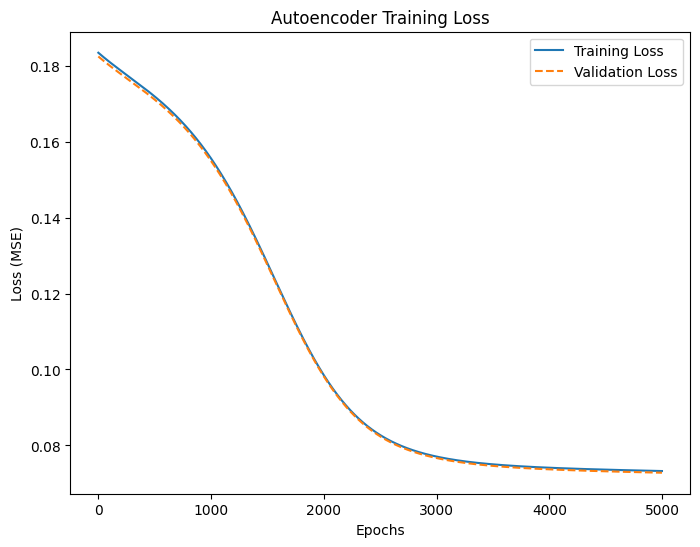

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Autoencoder Training Loss')
plt.legend()
plt.show()

In [8]:
X_val_reconstructed = autoencoder.predict(X_val)
reconstruction_error = np.mean((X_val - X_val_reconstructed) ** 2)
print(f"Average Reconstruction Error on Validation Set: {reconstruction_error:.6f}")


Average Reconstruction Error on Validation Set: 0.072833


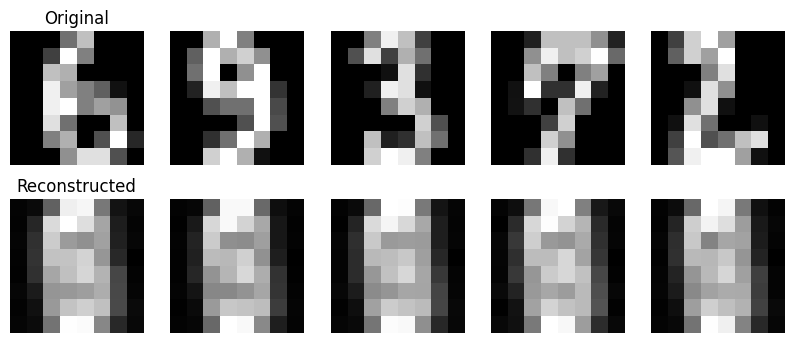

In [9]:
num_samples = 5
X_val_reconstructed = autoencoder.predict(X_val)

fig, axes = plt.subplots(2, num_samples, figsize=(10, 4))
for i in range(num_samples):
    axes[0, i].imshow(X_val[:, i].reshape(8, 8), cmap='gray')
    axes[0, i].axis("off")
    axes[1, i].imshow(X_val_reconstructed[:, i].reshape(8, 8), cmap='gray')
    axes[1, i].axis("off")

axes[0, 0].set_title("Original")
axes[1, 0].set_title("Reconstructed")
plt.show()

 I chose lr = 0.01 because smaller values failed to reach a stable loss even after 5000 epochs, while this learning rate allowed efficient convergence without instability. I set the batch size to 128 as it significantly sped up training while achieving the same final MSE of 0.07, which indicates strong reconstruction performance. For the loss function, I selected MSE over cross-entropy since it directly measures pixel-wise reconstruction error and aligns better with continuous grayscale data. These choices ensure an optimal balance between training speed, stability, and accuracy.